In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def create_ages(mu=50,sigma=13,num_samples=100,seed=42):
    
    np.random.seed(seed)
    
    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    
    return sample_ages

In [3]:
sample = create_ages()

In [4]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

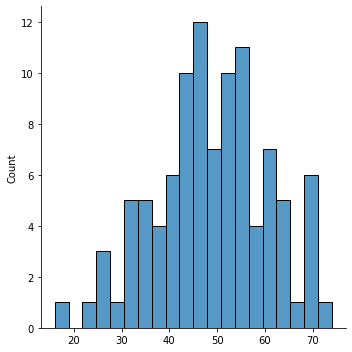

In [5]:
sns.displot(sample,bins=20)

<AxesSubplot:>

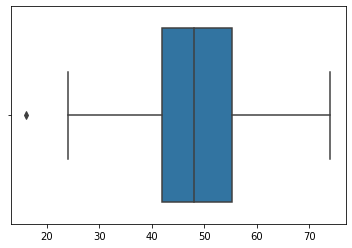

In [6]:
sns.boxplot(x=sample)
# note that using the IQR methodology we find an outlier

In [7]:
# we index the array by calling the Series method and calling it
ser = pd.Series(data=sample)

In [8]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [9]:
IQR = ser.quantile(.75)-ser.quantile(.25)
IQR

13.25

In [10]:
1.5*IQR

19.875

In [11]:
lower_limit = ser.quantile(.25) - 1.5*IQR
lower_limit

22.125

In [12]:
# with a filter we can get rid of the outliers
ser[(ser > lower_limit) & (ser < ser.quantile(.75) + 1.5*IQR)]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [13]:
# alternative with tuple unpacking
q25, q75 = np.percentile(a=sample, q=[25,75])
iqr = q75 - q25

In [14]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('../prep-data/Ames_Housing_Data.csv')

In [15]:
df.head()

# the label we're trying to predict is the (final) SalePrice. We're to predict the sale price given all these features. 

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  526301100           20        RL         141.0     31770   Pave   NaN   
1  526350040           20        RH          80.0     11622   Pave   NaN   
2  526351010           20        RL          81.0     14267   Pave   NaN   
3  526353030           20        RL          93.0     11160   Pave   NaN   
4  527105010           60        RL          74.0     13830   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
1       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
3       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
4       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      1Story             6             5   
1       Feedr        Norm      1Fam      1Story             5             6   
2        Norm        Norm      1Fam      1Story             6             6   
3        Norm        Norm      1Fam      1Story             7             5   
4        Norm        Norm      1Fam      2Story             5             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1960            1960        Hip   CompShg      BrkFace      Plywood   
1        1961            1961      Gable   CompShg      VinylSd      VinylSd   
2        1958            1958        Hip   CompShg      Wd Sdng      Wd Sdng   
3        1968            1968        Hip   CompShg      BrkFace      BrkFace   
4        1997            1998      Gable   CompShg      VinylSd      VinylSd   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0        Stone         112.0         TA         TA     CBlock        TA   
1         None           0.0         TA         TA     CBlock        TA   
2      BrkFace         108.0         TA         TA     CBlock        TA   
3         None           0.0         Gd         TA     CBlock        TA   
4         None           0.0         TA         TA      PConc        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        Gd            Gd            BLQ         639.0            Unf   
1        TA            No            Rec         468.0            LwQ   
2        TA            No            ALQ         923.0            Unf   
3        TA            No            ALQ        1065.0            Unf   
4        TA            No            GLQ         791.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        441.0         1080.0    GasA         Fa           Y   
1         144.0        270.0          882.0    GasA         TA           Y   
2           0.0        406.0         1329.0    GasA         TA           Y   
3           0.0       1045.0         2110.0    GasA         Ex           Y   
4           0.0        137.0          928.0    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr        1656           0                0         1656   
1      SBrkr         896           0                0          896   
2      SBrkr        1329           0                0         1329   
3      SBrkr        2110           0                0         2110   
4      SBrkr         928         701                0         1629   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             1.0             0.0          1          0              3   
1             0.0             0.0          1          0              2   
2             0.0             0.0          1          1              3   
3             1.0             0.0          2          1              3   
4      

In [16]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

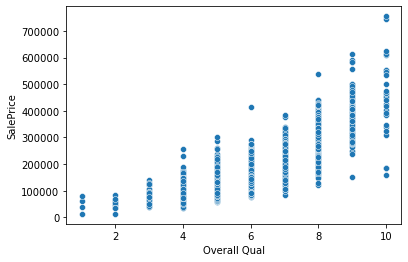

In [17]:
sns.scatterplot(data=df, x='Overall Qual',y='SalePrice')

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

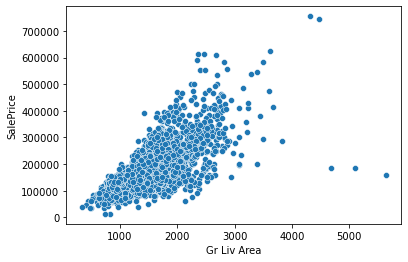

In [18]:
sns.scatterplot(data=df, x='Gr Liv Area',y='SalePrice')

In [19]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
1182  533350090           60        RL           NaN     24572   Pave   NaN   
1498  908154235           60        RL         313.0     63887   Pave   NaN   
2180  908154195           20        RL         128.0     39290   Pave   NaN   
2181  908154205           60        RL         130.0     40094   Pave   NaN   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
1182       IR1          Lvl    AllPub    CulDSac        Gtl      Veenker   
1498       IR3          Bnk    AllPub     Corner        Gtl      Edwards   
2180       IR1          Bnk    AllPub     Inside        Gtl      Edwards   
2181       IR1          Bnk    AllPub     Inside        Gtl      Edwards   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1182        Norm        Norm      1Fam      2Story             9   
1498       Feedr        Norm      1Fam      2Story            10   
2180        Norm        Norm      1Fam      1Story            10   
2181        PosN        PosN      1Fam      2Story            10   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
1182             3        1977            1977    Mansard   CompShg   
1498             5        2008            2008        Hip   ClyTile   
2180             5        2008            2009        Hip   CompShg   
2181             5        2007            2008        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
1182      Wd Sdng      Wd Sdng      BrkFace        1050.0         Gd   
1498       Stucco       Stucco        Stone         796.0         Ex   
2180      CemntBd      CmentBd        Stone        1224.0         Ex   
2181      CemntBd      CmentBd        Stone         762.0         Ex   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
1182         Gd     CBlock        Gd        TA            No            GLQ   
1498         TA      PConc        Ex        TA            Gd            GLQ   
2180         TA      PConc        Ex        TA            Gd            GLQ   
2181         TA      PConc        Ex        TA            Gd            GLQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
1182         410.0            Unf           0.0        584.0          994.0   
1498        5644.0            Unf           0.0        466.0         6110.0   
2180        4010.0            Unf           0.0       1085.0         5095.0   
2181        2260.0            Unf           0.0        878.0         3138.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1182    GasA         TA           Y      SBrkr        1599        1345   
1498    GasA         Ex           Y      SBrkr        4692         950   
2180    GasA         Ex           Y      SBrkr        5095           0   
2181    GasA         Ex           Y      SBrkr        3138        1538   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1182                0         2944             0.0             0.0          2   
1498                0         5642             2.0             0.0          2   
2180                0         5095             1.0             1.0          2   
2181                0         4676             1.0             0.0          3   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1182          2              3              1           Gd              9   
1498          1              3              1           Ex             12   
2180          1              2              1           Ex             15   
2181          1              3              1           Ex             11   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
1182        Typ           1           Gd      Attchd         1977.0   
1498        Typ           3           Gd      Attchd         2008.0   
2180     

In [20]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
1498  908154235           60        RL         313.0     63887   Pave   NaN   
2180  908154195           20        RL         128.0     39290   Pave   NaN   
2181  908154205           60        RL         130.0     40094   Pave   NaN   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
1498       IR3          Bnk    AllPub     Corner        Gtl      Edwards   
2180       IR1          Bnk    AllPub     Inside        Gtl      Edwards   
2181       IR1          Bnk    AllPub     Inside        Gtl      Edwards   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1498       Feedr        Norm      1Fam      2Story            10   
2180        Norm        Norm      1Fam      1Story            10   
2181        PosN        PosN      1Fam      2Story            10   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
1498             5        2008            2008        Hip   ClyTile   
2180             5        2008            2009        Hip   CompShg   
2181             5        2007            2008        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
1498       Stucco       Stucco        Stone         796.0         Ex   
2180      CemntBd      CmentBd        Stone        1224.0         Ex   
2181      CemntBd      CmentBd        Stone         762.0         Ex   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
1498         TA      PConc        Ex        TA            Gd            GLQ   
2180         TA      PConc        Ex        TA            Gd            GLQ   
2181         TA      PConc        Ex        TA            Gd            GLQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
1498        5644.0            Unf           0.0        466.0         6110.0   
2180        4010.0            Unf           0.0       1085.0         5095.0   
2181        2260.0            Unf           0.0        878.0         3138.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1498    GasA         Ex           Y      SBrkr        4692         950   
2180    GasA         Ex           Y      SBrkr        5095           0   
2181    GasA         Ex           Y      SBrkr        3138        1538   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1498                0         5642             2.0             0.0          2   
2180                0         5095             1.0             1.0          2   
2181                0         4676             1.0             0.0          3   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1498          1              3              1           Ex             12   
2180          1              2              1           Ex             15   
2181          1              3              1           Ex             11   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
1498        Typ           3           Gd      Attchd         2008.0   
2180        Typ           2           Gd      Attchd         2008.0   
2181        Typ           1           Gd     BuiltIn         2007.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
1498           Fin          2.0       1418.0          TA          TA   
2180           Fin          3.0       1154.0          TA          TA   
2181           Fin          3.0        884.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1498           Y           214            292               0           0   
2180           Y           546            484               0           0   
2181           Y           208            406               0           0   

      Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  \
1498            

In [21]:
drop_index = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [22]:
df = df.drop(drop_index, axis=0)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

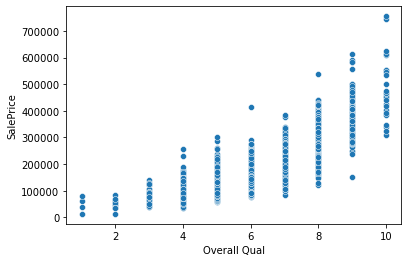

In [23]:
sns.scatterplot(data=df, x='Overall Qual',y='SalePrice')

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

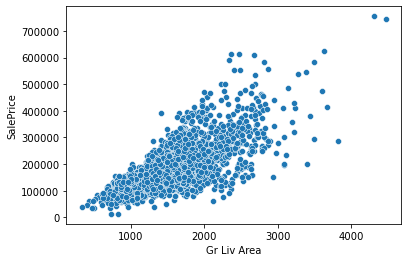

In [24]:
sns.scatterplot(data=df, x='Gr Liv Area',y='SalePrice')